# Trabajo Prácitco V2 - 191022 

Materia: Aprendizaje Automático

Docente: Narciso Perez

Integrantes del grupo de estudio: Carina Giovine y Eduardo Herrero Rivero.

# Consignas:

1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.


In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import graphviz

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier # si ya importamos tree estos dos son necesarios?
from sklearn.tree import plot_tree

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Montamos mi unidad de Drive:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importo el set de datos y se lo instancio a "dataset"

path="/content/drive/MyDrive/Practico/loan_data.csv"

dataset = pd.read_csv(path,comment="#")

# Hacemos la división de las variables:

X, y = dataset.iloc[:, 1:], dataset.TARGET

# Hacemos la división entre entrenamiento y evaluación:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# Visualizamos:

dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


El conjunto de datos se trata de datos recopilados por el departamento de créditos de un banco. El mismo incluye datos de préstamos de solicitantes recientes a los que se les otorgó crédito a través del proceso actual de suscripción de los mismos.

La variable objetivo es la variable binaria 'TARGET'. En la misma se muestra si el cliente cumplió o incumplió el pago y tiene la siguiente salida:

1 - si el cliente incumplió el pago del préstamo.


0 - si el cliente cumplió el pago del préstamo.


Esta es la variable que se utilizará para realizar la predicción de calificación crediticia y poder decidir si se debe otorgar o no un crédito a un nuevo solicitante.



---

Analizamos nuestros datos:

In [5]:
# Observamos las dimensiones:

dataset.shape

(1854, 11)

In [6]:
# Observamos los nombres de las columnas:

dataset.columns

Index(['TARGET', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [7]:
# Observamos el tipo de datos:

dataset.dtypes

TARGET       int64
LOAN         int64
MORTDUE    float64
VALUE      float64
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

Los atributos disponibles para realizar la predicción son:

TARGET - Variable que indica el cumplimiento o no en el pago del préstamo.

LOAN - Importe solicitado en el préstamo.

MORTDUE - Monto adeudado sobre la hipoteca existente.

VALUE - Valor actual de la propiedad.

YOJ - Antigüedad en el trabajo actual.

DEROG - Número de informes despectivos importantes.

DELINQ - Número de líneas de crédito morosas.

CLAGE - Antigüedad de la línea comercial más antigua en meses.

NINQ - Número de líneas de crédito recientes.

CLNO - Número de líneas de crédito.

DEBTINC - Relación deuda-ingresos.





---


Realizamos una gráfica para entender nuestra variable 'TARGET'

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]), <a list of 10 Text major ticklabel objects>)

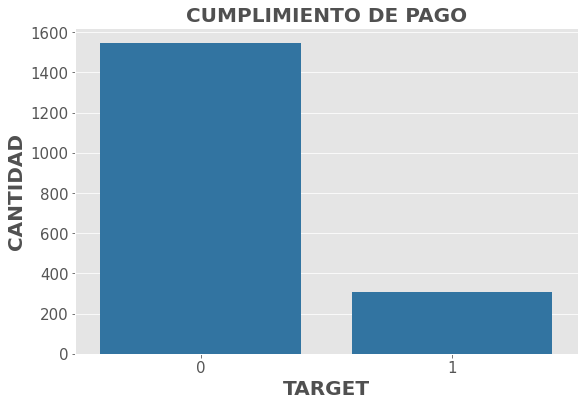

In [8]:
 # Graficamente podemos verlo de la siguiente manera:
 
fig = plt.figure(figsize=(9,6))
sns.countplot(data=dataset, x='TARGET', color='tab:blue')

plt.title('CUMPLIMIENTO DE PAGO', 
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("CANTIDAD", size=20, fontweight='bold', color='#505050')
plt.xlabel("TARGET", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

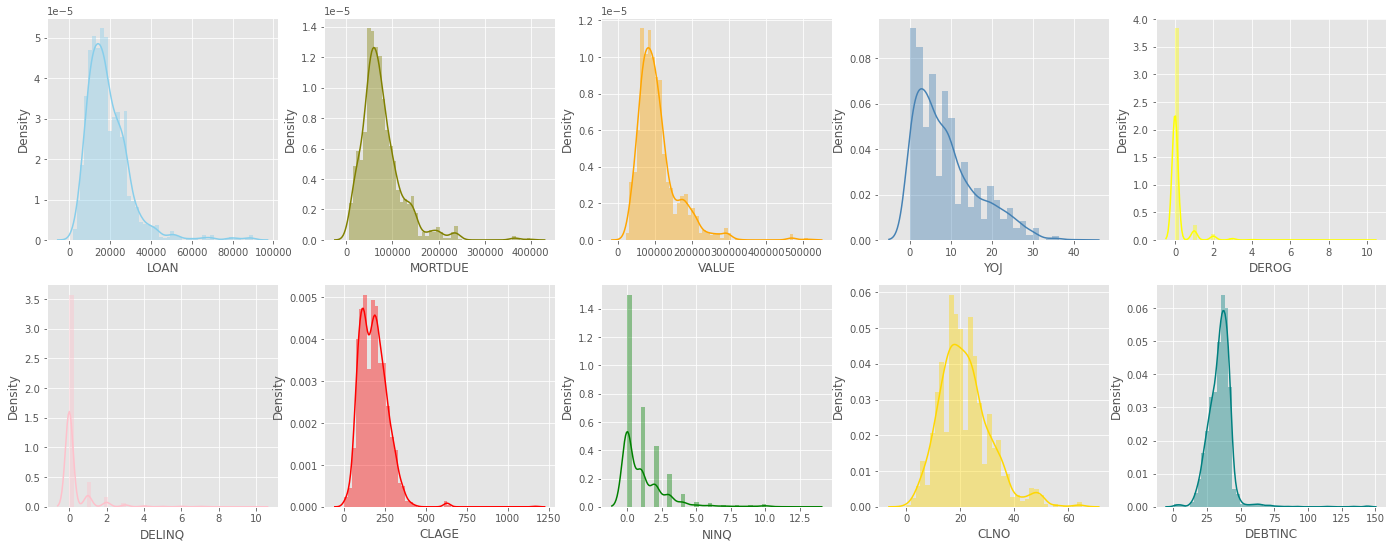

In [9]:
# Analizamos las distribuciones de nuestras variables:

f, axes = plt.subplots(2, 5, figsize=(24,9))
sns.distplot( dataset['LOAN'] , color="skyblue", ax=axes[0, 0])
sns.distplot( dataset['MORTDUE'] , color="olive", ax=axes[0, 1])
sns.distplot( dataset['VALUE'] , color="orange", ax=axes[0, 2])
sns.distplot( dataset['YOJ'] , color="steelblue", ax=axes[0, 3])
sns.distplot( dataset['DEROG'] , color="yellow", ax=axes[0, 4])
sns.distplot( dataset['DELINQ'] , color="pink", ax=axes[1, 0])
sns.distplot( dataset['CLAGE'] , color="red", ax=axes[1, 1])
sns.distplot( dataset['NINQ'] , color="green", ax=axes[1, 2])
sns.distplot( dataset['CLNO'] , color="gold", ax=axes[1, 3])
sns.distplot( dataset['DEBTINC'] , color="teal", ax=axes[1, 4])

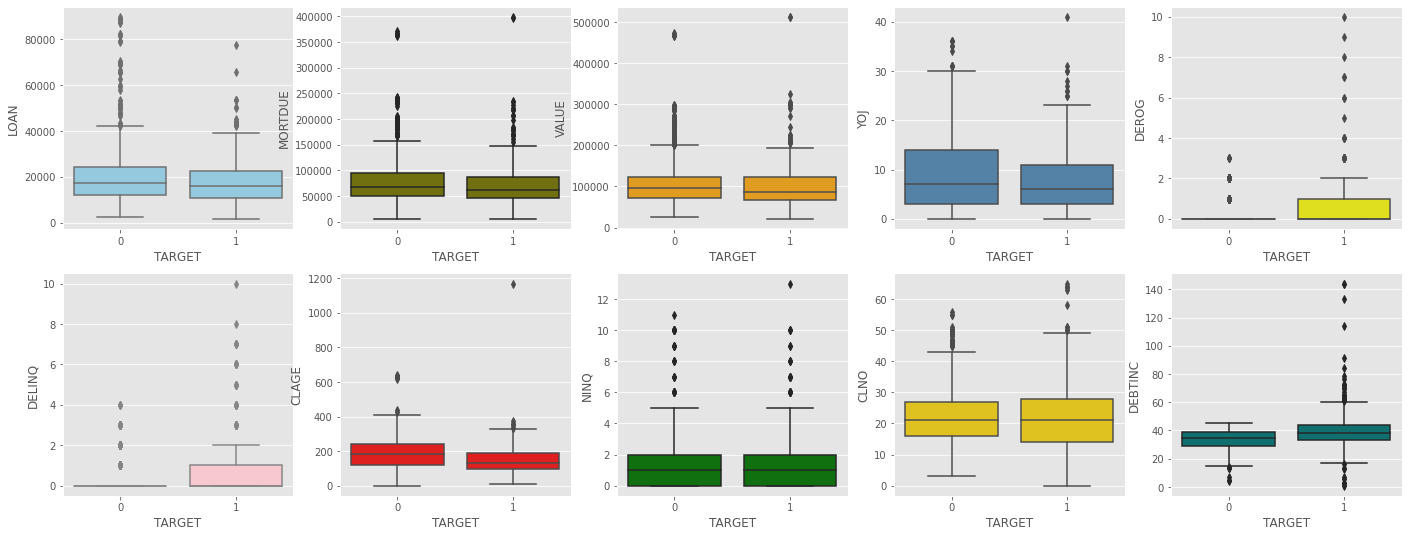

In [10]:
# Gráficas de Boxplot que nos permiten visualizar otras características:

f, axes = plt.subplots(2, 5, figsize=(24,9))
sns.boxplot(x = 'TARGET', y = 'LOAN', data = dataset , color="skyblue", ax=axes[0, 0])
sns.boxplot(x = 'TARGET', y = 'MORTDUE', data = dataset , color="olive", ax=axes[0, 1])
sns.boxplot(x = 'TARGET', y = 'VALUE', data = dataset , color="orange", ax=axes[0, 2])
sns.boxplot(x = 'TARGET', y = 'YOJ', data = dataset , color="steelblue", ax=axes[0, 3])
sns.boxplot(x = 'TARGET', y = 'DEROG', data = dataset , color="yellow", ax=axes[0, 4])
sns.boxplot(x = 'TARGET', y = 'DELINQ', data = dataset , color="pink", ax=axes[1, 0])
sns.boxplot(x = 'TARGET', y = 'CLAGE', data = dataset , color="red", ax=axes[1, 1])
sns.boxplot(x = 'TARGET', y = 'NINQ', data = dataset , color="green", ax=axes[1, 2])
sns.boxplot(x = 'TARGET', y = 'CLNO', data = dataset , color="gold", ax=axes[1, 3])
sns.boxplot(x = 'TARGET', y = 'DEBTINC', data = dataset , color="teal", ax=axes[1, 4])

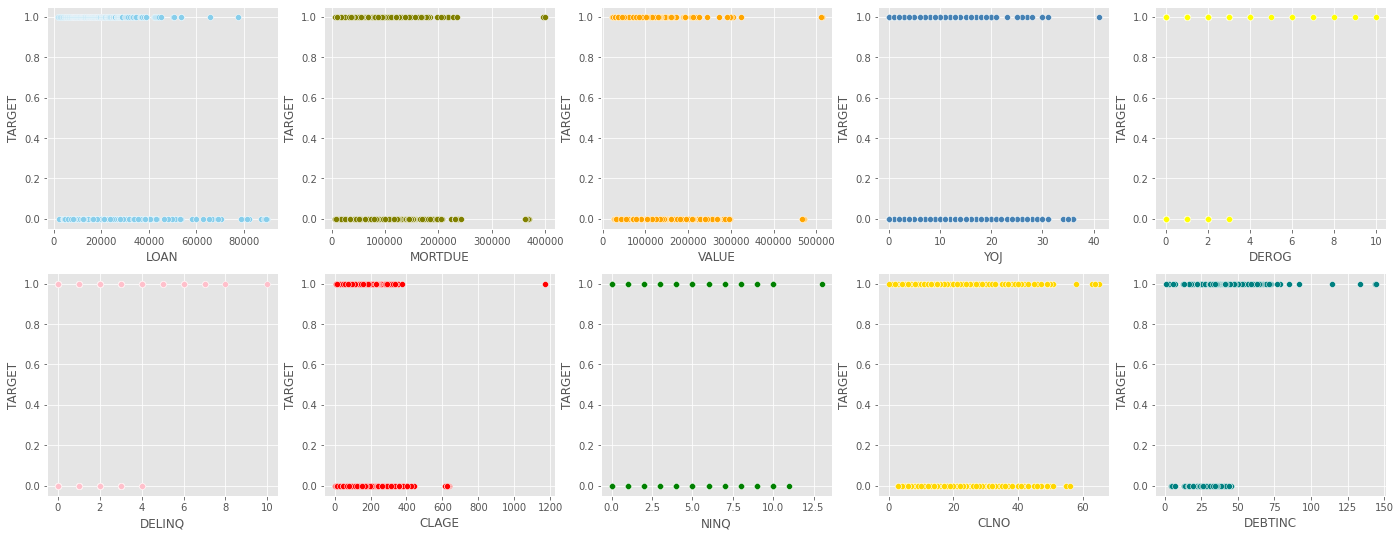

In [11]:
# Visualizamos la relación de las variables con nuestra variable 'TARGET':

f, axes = plt.subplots(2, 5, figsize=(24,9))
sns.scatterplot(x = 'LOAN', y = 'TARGET', data = dataset , color="skyblue", ax=axes[0, 0])
sns.scatterplot(x = 'MORTDUE', y = 'TARGET', data = dataset , color="olive", ax=axes[0, 1])
sns.scatterplot(x = 'VALUE', y = 'TARGET', data = dataset , color="orange", ax=axes[0, 2])
sns.scatterplot(x = 'YOJ', y = 'TARGET', data = dataset , color="steelblue", ax=axes[0, 3])
sns.scatterplot(x = 'DEROG', y = 'TARGET', data = dataset , color="yellow", ax=axes[0, 4])
sns.scatterplot(x = 'DELINQ', y = 'TARGET', data = dataset , color="pink", ax=axes[1, 0])
sns.scatterplot(x = 'CLAGE', y = 'TARGET', data = dataset , color="red", ax=axes[1, 1])
sns.scatterplot(x = 'NINQ', y = 'TARGET', data = dataset , color="green", ax=axes[1, 2])
sns.scatterplot(x = 'CLNO', y = 'TARGET', data = dataset , color="gold", ax=axes[1, 3])
sns.scatterplot(x = 'DEBTINC', y = 'TARGET', data = dataset , color="teal", ax=axes[1, 4])


**Matriz de correlación.**

Analizamos la relación entre las variables
---



Text(0.5, 1.0, 'Correlation between Variables')

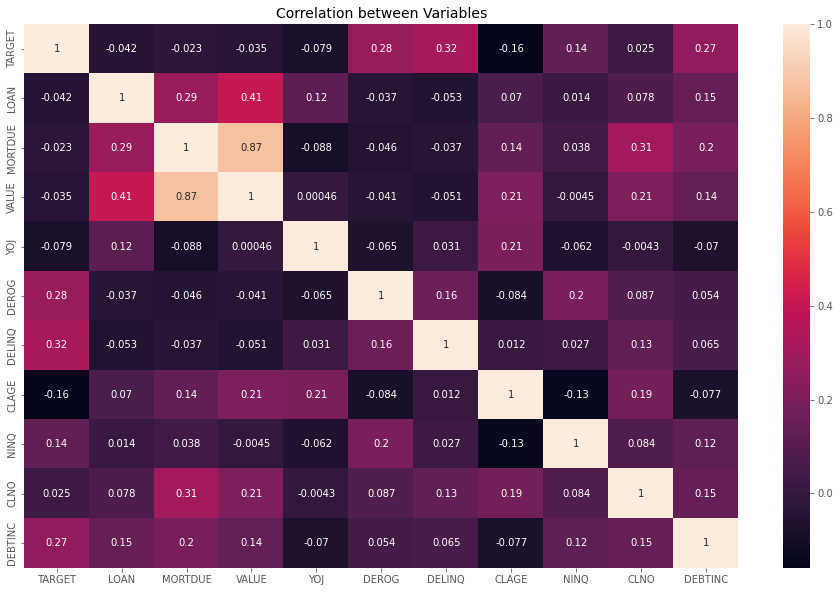

In [12]:
# Creamos un mapa de calor para la correlación calculada:

plt.figure(figsize=(16,10))
sns.heatmap(dataset[dataset.columns].corr(),annot=True, fmt='.2g')
plt.title('Correlation between Variables', fontsize=14)

Los atributos que estimo que pueden ser mas determinantes para la predicción, son:

DEROG - número de informes despectivos importantes.

DELINQ - número de líneas de crédito morosas.

CLAGE - Antigüedad de la línea comercial más antigua en meses.

NINQ - Número de líneas de crédito recientes.

DEBTINC - Relación deuda-ingresos.



---

Clasificación con Modelos Lineales

In [13]:
# SGDClassifier con hiperparámetros por defecto:

# Entrenamos el modelo:???

model1 = SGDClassifier(random_state=42)
model1.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [14]:
# Y aca entrenamos de nvo????

model1=Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(random_state=42))])

model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model', SGDClassifier(random_state=42))])

In [15]:
# Medimos la precisión del modelo:

score = model1.score(X_train, y_train)
print("Training score: ", score) 

Training score:  0.8260283209710048




---


Predicción  de valores de entrenamiento



In [16]:
# Instanciamos:

ypredtrain = model1.predict(X_train)

In [17]:
# Métricas del conjunto de Entrenamiento:

acs=accuracy_score(y_train,ypredtrain) 
rs=recall_score(y_train,ypredtrain, average=None) 
ps=precision_score(y_train,ypredtrain, average=None)
f1 = f1_score(y_train, ypredtrain, average=None)
print("accuracy score : ",acs)
print("precision score : ",ps)
print("recall score : ",rs)
print("f1 score : ",f1)

accuracy score :  0.8260283209710048
precision score :  [0.86561562 0.47682119]
recall score :  [0.93587662 0.28685259]
f1 score :  [0.89937598 0.35820896]


In [18]:
# Informe con las métricas:

print(classification_report(y_train, ypredtrain))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1232
           1       0.48      0.29      0.36       251

    accuracy                           0.83      1483
   macro avg       0.67      0.61      0.63      1483
weighted avg       0.80      0.83      0.81      1483



Matriz de Confusión para el conjunto de Entrenamiento.

In [19]:
# Generamos la matriz de confusión:

cm = confusion_matrix(y_train, ypredtrain)
print(cm.T)

[[1153  179]
 [  79   72]]


[Text(30.5, 0.5, 'Predicted Label'), Text(0.5, 21.5, 'True Label')]

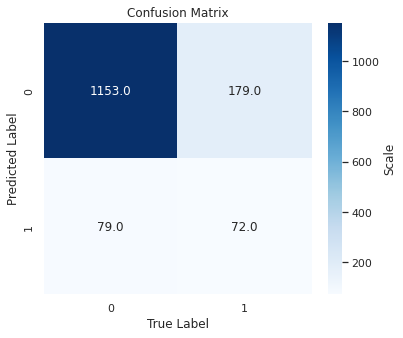

In [20]:
# Graficamos la matriz de confusión:

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Confusion Matrix" )
# define labels
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")

In [21]:
# Realizamos la predicción para los valores de Evaluación:

ypred = model1.predict(X_test)
ypred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Evaluación conjunto de Test

In [22]:
# Medida de rendimiento de importación:

acs=accuracy_score(y_test,ypred) 
rs=recall_score(y_test,ypred, average=None) 
ps=precision_score(y_test,ypred, average=None)
f1 = f1_score(y_test, ypred,  average=None)
print("accuracy score : ",acs)
print("precision score : ",ps)
print("recall score : ",rs)
print("f1 score : ",f1)

accuracy score :  0.8194070080862533
precision score :  [0.86826347 0.37837838]
recall score :  [0.92651757 0.24137931]
f1 score :  [0.89644513 0.29473684]


In [23]:
# Informe de la Clasificación:

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       313
           1       0.38      0.24      0.29        58

    accuracy                           0.82       371
   macro avg       0.62      0.58      0.60       371
weighted avg       0.79      0.82      0.80       371



In [24]:

cm1 = confusion_matrix(y_test, ypred)
print(cm1.T)

[[290  44]
 [ 23  14]]


[Text(30.5, 0.5, 'Predicted Label'), Text(0.5, 21.5, 'True Label')]

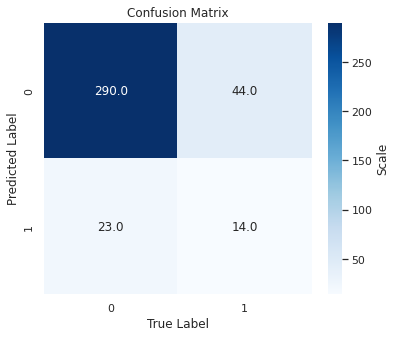

In [25]:
# Vemos la matriz de confusión:

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Confusion Matrix" )

# define labels
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm1.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")



---

# **Árboles de Decisión**

Se entrenarán árboles de decisión para predecir la variable objetivo.

In [27]:
# DecisionTreeClassifier con hiperparámetros por defecto:

clf = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [28]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

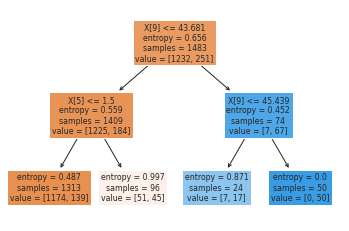

In [29]:
plot_tree(clf,filled=True);

In [30]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

In [31]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 7 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 9] <= 43.68142318725586 else to node 4.
	node=1 is a split node: go to node 2 if X[:, 5] <= 1.5 else to node 3.
		node=2 is a leaf node.
		node=3 is a leaf node.
	node=4 is a split node: go to node 5 if X[:, 9] <= 45.43897247314453 else to node 6.
		node=5 is a leaf node.
		node=6 is a leaf node.


In [33]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 0.87
Test accuracy: 0.88


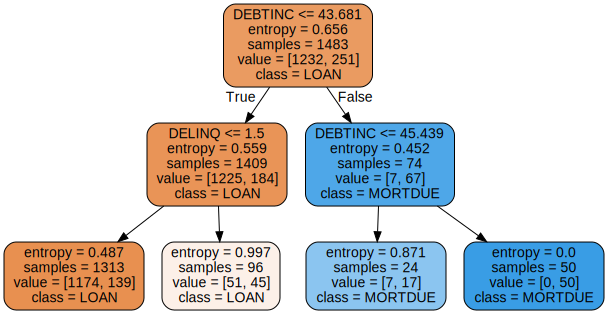

In [34]:
dot_data = tree.export_graphviz(clf, out_file=None, 
  feature_names=['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'],  
  class_names=['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'],  
  filled=True, rounded=True
  )

graph = graphviz.Source(dot_data)
graph

Métricas

In [35]:
# Precisiòn del modelo:

precision_score(y_train, y_train_pred)

0.9054054054054054

In [36]:
# Recall:

recall_score(y_train, y_train_pred)

0.26693227091633465

In [37]:
# f1 Score:

f1_score(y_train, y_train_pred)

0.41230769230769226

In [38]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1232
           1       0.91      0.27      0.41       251

    accuracy                           0.87      1483
   macro avg       0.89      0.63      0.67      1483
weighted avg       0.88      0.87      0.84      1483



In [39]:
# Matriz de confusión para el conjunto de entrenamiento:

cm2=confusion_matrix(y_train, y_train_pred)
cm2

array([[1225,    7],
       [ 184,   67]])

[Text(30.5, 0.5, 'Predicted Label'), Text(0.5, 21.5, 'True Label')]

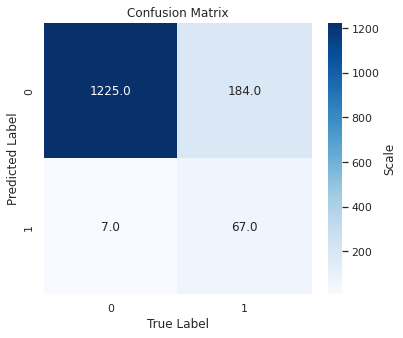

In [40]:
sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Confusion Matrix" )

# Define labels:
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm2.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")

Métricas

In [41]:
# Precisión:

precision_score(y_test, y_test_pred)

0.85

In [42]:
# Recall:

recall_score(y_test, y_test_pred)


0.29310344827586204

In [43]:
# f1 Score:

f1_score(y_test, y_test_pred)

0.4358974358974359

In [44]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       313
           1       0.85      0.29      0.44        58

    accuracy                           0.88       371
   macro avg       0.87      0.64      0.68       371
weighted avg       0.88      0.88      0.86       371



Matriz de confusión para el conjunto de evaluación

In [45]:
#

cm3=confusion_matrix(y_test, y_test_pred)
cm3

array([[310,   3],
       [ 41,  17]])

[Text(30.5, 0.5, 'Predicted Label'), Text(0.5, 21.5, 'True Label')]

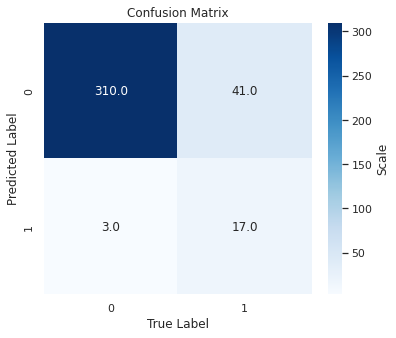

In [46]:
sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Confusion Matrix" )
# define labels
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm3.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")